# **Importing Libraries**

In [377]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as ss
from plotly.offline import iplot
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, label_binarize, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import plotly.express as px
import math
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from prophet import Prophet

# **Data Loading and Exploration**

In [378]:
data = pd.read_excel('Maize_Prices.xlsx')
data.describe()

,Date,Year,Date.1,Minimum,Maximum,Average
count,9514.000000,9514.000000,9514,9514.000000,9514.000000,9514.000000
mean,15.559386,2020.834139,2021-04-17 08:19:28.467521792,2452.600347,2899.098707,3073.812503
min,1.000000,2019.000000,2019-01-01 00:00:00,850.000000,1300.000000,1262.500000
25%,8.000000,2020.000000,2020-03-11 00:00:00,2050.000000,2250.000000,2475.000000
50%,15.000000,2021.000000,2021-04-29 00:00:00,2500.000000,2925.000000,2931.250000
75%,23.000000,2022.000000,2022-03-01 18:00:00,2875.000000,3500.000000,3637.500000
max,31.000000,2023.000000,2023-12-27 00:00:00,3800.000000,4875.000000,8850.000000
std,8.670541,1.233331,NaN,621.349600,794.879029,914.153124


In [379]:
data.shape

(9514, 8)

In [380]:
data.head(5)

,Month,Date,Year,Date.1,stations,Minimum,Maximum,Average
0,Jan,1,2019,2019-01-01,Dunyapur,2000.0,2500.0,2250.0
1,Jan,1,2019,2019-01-01,Kahror Pacca,2000.0,2500.0,2250.0
2,Jan,1,2019,2019-01-01,Khanewal,2000.0,2750.0,2375.0
3,Jan,1,2019,2019-01-01,Hasilpur,2500.0,2750.0,2625.0
4,Jan,1,2019,2019-01-01,Bahawalnagar,2250.0,3125.0,2687.5


In [381]:
data.dtypes

Month               object
Date                 int64
Year                 int64
Date.1      datetime64[ns]
stations            object
Minimum            float64
Maximum            float64
Average            float64
dtype: object

# **Data Cleaning**

## **a) Missing Values**

In [382]:
data.isna().sum()

Month       0
Date        0
Year        0
Date.1      0
stations    0
Minimum     0
Maximum     0
Average     0
dtype: int64

In [383]:
data.nunique()

Month         12
Date          31
Year           5
Date.1      1125
stations      53
Minimum      237
Maximum      525
Average     1021
dtype: int64

In [384]:
# print all stations
data['stations'].unique()

array(['Dunyapur', 'Kahror Pacca', 'Khanewal', 'Hasilpur', 'Bahawalnagar',
       'Chichawatni', 'Burewala', 'Arifwala', 'Chishtian', 'Sahiwal',
       'Mian Channu', 'Pakpattan', 'Okara', 'Pattoki', 'Shujabad',
       'Kasur', 'Tobe Tek Singh', 'Samundari', 'Gujrat', 'Vehari',
       'Kamalia', 'Layyah', 'Jauhrabad', 'Bhakkar', 'Dera Ghazi Khan',
       'Rawalpindi', 'Multan', 'Faisalabad', 'Lala Musa', 'Chakwal',
       'Jhelum', 'Sialkot', 'Jalalpur Jattan', 'Hazro', 'Sargodha',
       'Mianwali', 'Gujranwala', 'Nowhera Virkan', 'Wazirabad',
       'Haroonabad', 'Pak Pattan', 'Dipalpur', 'C.Watni', 'Arif Wala',
       'Duniyapur', 'Depalpur', 'Toba Tek Singh', 'Khairpur', 'Pak Patan',
       'Mian Chanu', 'Mailsi', 'Kehror Pakka', 'Kehror Paka'],
      dtype=object)

In [385]:
name_mapping = {
    'Dunyapur': 'Dunyapur', 'Duniyapur': 'Dunyapur',
    'Kahror Pacca': 'Kahror Pacca', 'Kehror Pakka': 'Kahror Pacca', 'Kehror Paka': 'Kahror Pacca',
    'Khanewal': 'Khanewal',
    'Hasilpur': 'Hasilpur',
    'Bahawalnagar': 'Bahawalnagar',
    'Chichawatni': 'Chichawatni', 'C.Watni': 'Chichawatni',
    'Burewala': 'Burewala',
    'Arifwala': 'Arifwala', 'Arif Wala': 'Arifwala',
    'Chishtian': 'Chishtian',
    'Sahiwal': 'Sahiwal',
    'Mian Channu': 'Mian Channu', 'Mian Chanu': 'Mian Channu',
    'Pakpattan': 'Pakpattan', 'Pak Pattan': 'Pakpattan', 'Pak Patan': 'Pakpattan',
    'Okara': 'Okara',
    'Pattoki': 'Pattoki',
    'Shujabad': 'Shujabad',
    'Kasur': 'Kasur',
    'Toba Tek Singh': 'Toba Tek Singh', 'Tobe Tek Singh': 'Toba Tek Singh',
    'Samundari': 'Samundari',
    'Gujrat': 'Gujrat',
    'Vehari': 'Vehari',
    'Kamalia': 'Kamalia',
    'Layyah': 'Layyah',
    'Jauhrabad': 'Jauhrabad',
    'Bhakkar': 'Bhakkar',
    'Dera Ghazi Khan': 'Dera Ghazi Khan',
    'Rawalpindi': 'Rawalpindi',
    'Multan': 'Multan',
    'Faisalabad': 'Faisalabad',
    'Lala Musa': 'Lala Musa',
    'Chakwal': 'Chakwal',
    'Jhelum': 'Jhelum',
    'Sialkot': 'Sialkot',
    'Jalalpur Jattan': 'Jalalpur Jattan',
    'Hazro': 'Hazro',
    'Sargodha': 'Sargodha',
    'Mianwali': 'Mianwali',
    'Gujranwala': 'Gujranwala',
    'Nowhera Virkan': 'Nowhera Virkan',
    'Wazirabad': 'Wazirabad',
    'Haroonabad': 'Haroonabad',
    'Dipalpur': 'Dipalpur', 'Depalpur': 'Dipalpur',
    'Khairpur': 'Khairpur',
    'Mailsi': 'Mailsi',
    'Hafizabad': 'Hafizabad',
    'Gojra': 'Gojra',
    'Rahim Yar Khan': 'Rahim Yar Khan',
    'Chowk Azam': 'Chowk Azam',
    'Bahawalpur': 'Bahawalpur',
    'Lodhran': 'Lodhran',
    'Sadiqabad': 'Sadiqabad',
    'Toba Tek Singh': 'Toba Tek Singh'
}


data['stations'] = data['stations'].map(name_mapping)

In [386]:
data.nunique()

Month         12
Date          31
Year           5
Date.1      1125
stations      43
Minimum      237
Maximum      525
Average     1021
dtype: int64

In [387]:
data.head(50)

,Month,Date,Year,Date.1,stations,Minimum,Maximum,Average
0,Jan,1,2019,2019-01-01,Dunyapur,2000.0,2500.0,2250.00
1,Jan,1,2019,2019-01-01,Kahror Pacca,2000.0,2500.0,2250.00
2,Jan,1,2019,2019-01-01,Khanewal,2000.0,2750.0,2375.00
3,Jan,1,2019,2019-01-01,Hasilpur,2500.0,2750.0,2625.00
4,Jan,1,2019,2019-01-01,Bahawalnagar,2250.0,3125.0,2687.50
5,Jan,1,2019,2019-01-01,Chichawatni,2250.0,3150.0,2700.00
6,Jan,1,2019,2019-01-01,Burewala,2375.0,3062.5,2718.75
7,Jan,1,2019,2019-01-01,Arifwala,2250.0,3250.0,2750.00
8,Jan,1,2019,2019-01-01,Chishtian,2625.0,2937.5,2781.25
9,Jan,1,2019,2019-01-01,Sahiwal,2687.5,3062.5,2875.00


## **b) Removing Duplicates**

In [388]:
data.duplicated().sum()

0

In [389]:
data.drop_duplicates(inplace=True)

In [390]:
data['Month'] = data['Month'].astype('category')

data['Date.1'] = pd.to_datetime(data['Date.1'])

data['stations'] = data['stations'].astype('category')

In [391]:
data['Average'] = (data['Minimum'] + data['Maximum']) / 2

## **c) Outlier**

In [392]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [393]:
filtered_data_min = remove_outliers(data, 'Minimum')
filtered_data_max = remove_outliers(filtered_data_min, 'Maximum')
filtered_data_avg = remove_outliers(filtered_data_max, 'Average')

print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers from all three columns: {filtered_data_avg.shape}")


Original data shape: (9514, 8)
Data shape after removing outliers from all three columns: (9514, 8)


*No outliers were detected*

In [394]:
data = filtered_data_avg

# **EDA** 

## **Summary**

In [395]:
numerical_summary = data.describe()

categorical_summary = data.describe(include=['category'])

print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)

Numerical Summary:
               Date         Year                         Date.1      Minimum  \
count  9514.000000  9514.000000                           9514  9514.000000   
mean     15.559386  2020.834139  2021-04-17 08:19:28.467521792  2452.600347   
min       1.000000  2019.000000            2019-01-01 00:00:00   850.000000   
25%       8.000000  2020.000000            2020-03-11 00:00:00  2050.000000   
50%      15.000000  2021.000000            2021-04-29 00:00:00  2500.000000   
75%      23.000000  2022.000000            2022-03-01 18:00:00  2875.000000   
max      31.000000  2023.000000            2023-12-27 00:00:00  3800.000000   
std       8.670541     1.233331                            NaN   621.349600   

           Maximum      Average  
count  9514.000000  9514.000000  
mean   2899.098707  2675.849527  
min    1300.000000  1262.500000  
25%    2250.000000  2188.125000  
50%    2925.000000  2694.500000  
75%    3500.000000  3250.000000  
max    4875.000000  3900.00000

## **Visualization**

### 1) Histograms for Numerical Data

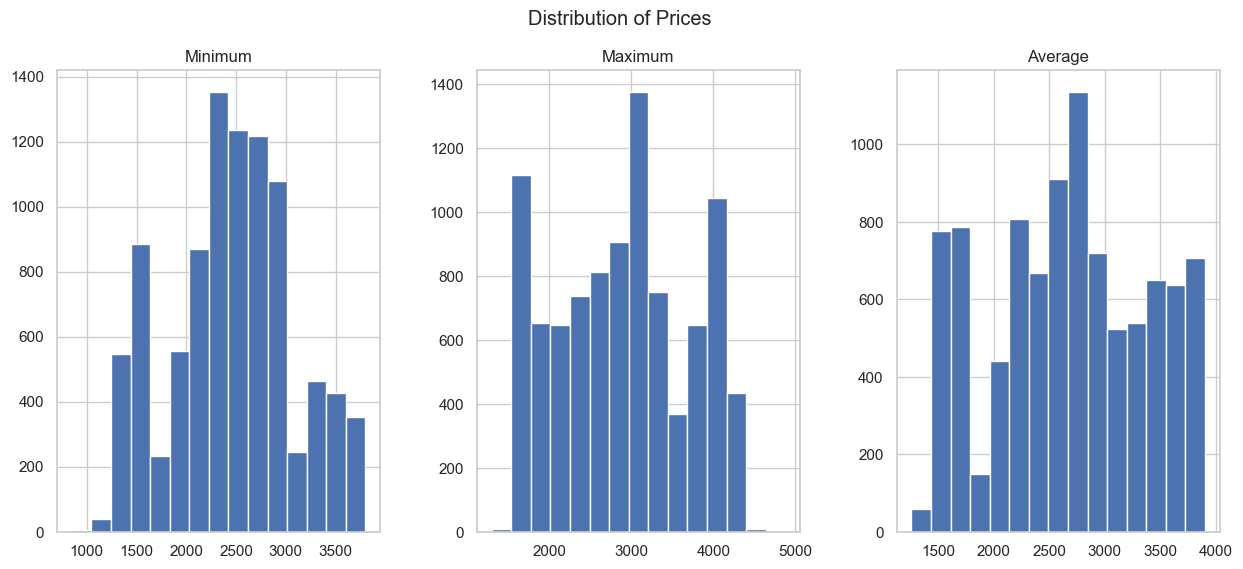

In [396]:
sns.set(style="whitegrid")

# Histograms
data[['Minimum', 'Maximum', 'Average']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distribution of Prices')
plt.show()

### 2) Box Plots for Numerical Data

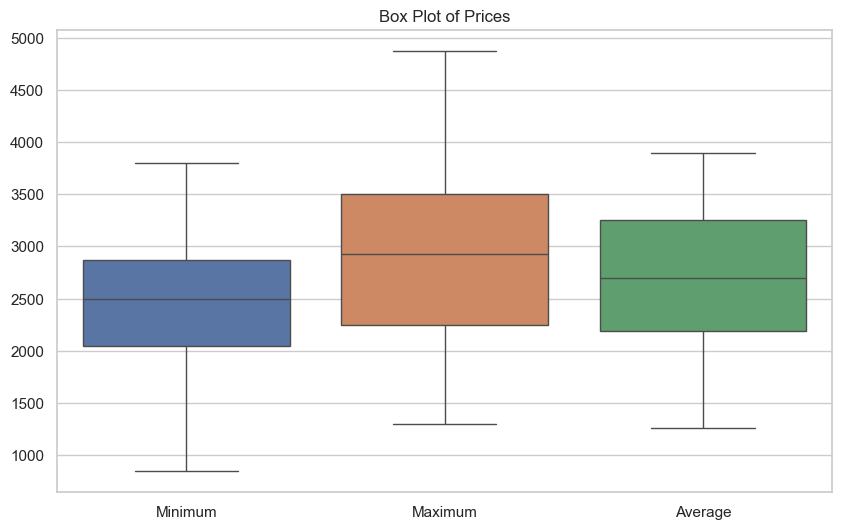

In [397]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Minimum', 'Maximum', 'Average']])
plt.title('Box Plot of Prices')
plt.show()

### 3) Count Plots for Categorical Data

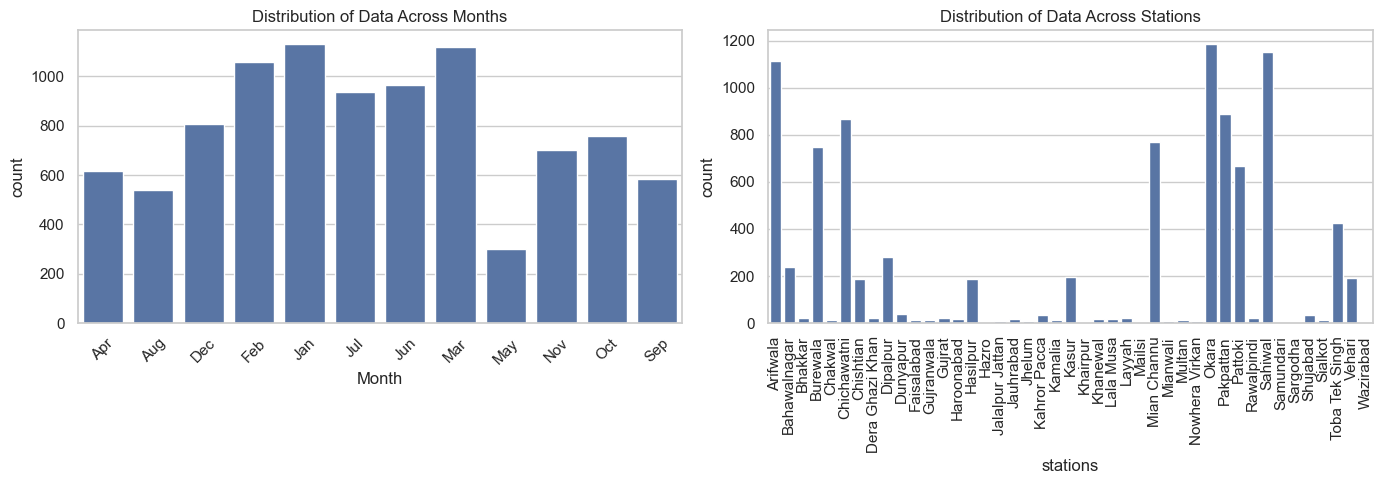

In [398]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=data, x='Month', ax=ax[0])
ax[0].set_title('Distribution of Data Across Months')
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='stations', ax=ax[1])
ax[1].set_title('Distribution of Data Across Stations')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## **Correlation**

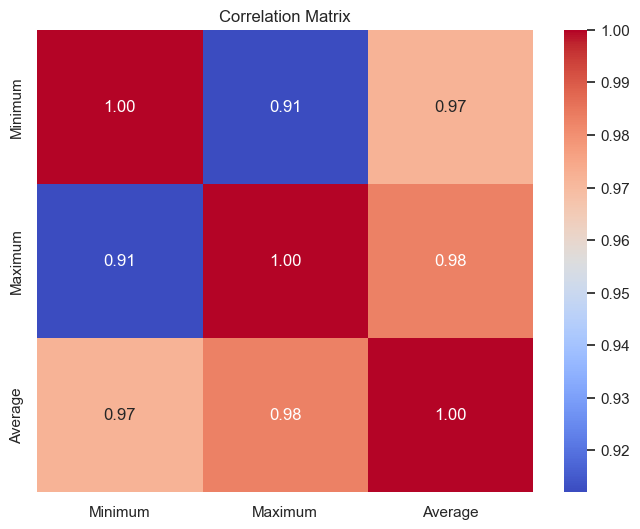

In [399]:
corr_matrix = data[['Minimum', 'Maximum', 'Average']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Data Transformation**

## **a) Scaling and Normalization**

In [400]:
scale_columns = ['Minimum', 'Maximum', 'Average']

scaler = StandardScaler()

data[scale_columns] = scaler.fit_transform(data[scale_columns])

In [401]:
data.describe()

,Date,Year,Date.1,Minimum,Maximum,Average
count,9514.000000,9514.000000,9514,9.514000e+03,9.514000e+03,9.514000e+03
mean,15.559386,2020.834139,2021-04-17 08:19:28.467521792,-8.245104e-16,-7.169656e-17,-9.559541e-17
min,1.000000,2019.000000,2019-01-01 00:00:00,-2.579360e+00,-2.011857e+00,-2.040688e+00
25%,8.000000,2020.000000,2020-03-11 00:00:00,-6.479790e-01,-8.166435e-01,-7.042092e-01
50%,15.000000,2021.000000,2021-04-29 00:00:00,7.628901e-02,3.258691e-02,2.692880e-02
75%,23.000000,2022.000000,2022-03-01 18:00:00,6.798457e-01,7.560054e-01,8.289968e-01
max,31.000000,2023.000000,2023-12-27 00:00:00,2.168619e+00,2.485919e+00,1.767510e+00
std,8.670541,1.233331,NaN,1.000053e+00,1.000053e+00,1.000053e+00


# **Feature Engineering**

https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0

## **a) Feature Addition**

In [402]:
data['Day_of_Week'] = data['Date.1'].dt.dayofweek
data['Is_Weekend'] = (data['Date.1'].dt.weekday >= 5).astype(int)
data['Quarter'] = data['Date.1'].dt.quarter

In [403]:
data['Lag_1_Day_Min'] = data['Minimum'].shift(1)
data['Lag_1_Day_Max'] = data['Maximum'].shift(1)
data['Lag_1_Day_Avg'] = data['Average'].shift(1)

# Fill any NaN values that were introduced by shifting
data.bfill(inplace=True)

In [404]:
data['Rolling_Mean_3'] = data['Average'].rolling(window=3).mean()
data['Rolling_Std_3'] = data['Average'].rolling(window=3).std()
data['Rolling_Mean_7'] = data['Average'].rolling(window=7).mean()
data['Rolling_Std_7'] = data['Average'].rolling(window=7).std()

# Again, fill any NaN values
data.bfill(inplace=True)

In [405]:
scaler = StandardScaler()
numerical_features = ['Minimum', 'Maximum', 'Average', 'Lag_1_Day_Min', 'Lag_1_Day_Max', 'Lag_1_Day_Avg',
                      'Rolling_Mean_3', 'Rolling_Std_3', 'Rolling_Mean_7', 'Rolling_Std_7']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [406]:
data.head(10)

,Month,Date,Year,Date.1,stations,Minimum,Maximum,Average,Day_of_Week,Is_Weekend,Quarter,Lag_1_Day_Min,Lag_1_Day_Max,Lag_1_Day_Avg,Rolling_Mean_3,Rolling_Std_3,Rolling_Mean_7,Rolling_Std_7
0,Jan,1,2019,2019-01-01,Dunyapur,-0.728453,-0.502114,-0.614870,1,0,1,-0.728441,-0.502187,-0.614909,-0.597662,-0.206142,-0.272246,-0.011057
1,Jan,1,2019,2019-01-01,Kahror Pacca,-0.728453,-0.502114,-0.614870,1,0,1,-0.728441,-0.502187,-0.614909,-0.597662,-0.206142,-0.272246,-0.011057
2,Jan,1,2019,2019-01-01,Khanewal,-0.728453,-0.187584,-0.434387,1,0,1,-0.728441,-0.502187,-0.614909,-0.597662,-0.206142,-0.272246,-0.011057
3,Jan,1,2019,2019-01-01,Hasilpur,0.076289,-0.187584,-0.073420,1,0,1,-0.728441,-0.187644,-0.434422,-0.403219,0.207836,-0.272246,-0.011057
4,Jan,1,2019,2019-01-01,Bahawalnagar,-0.326082,0.284211,0.016822,1,0,1,0.076297,-0.187644,-0.073448,-0.176369,0.118673,-0.272246,-0.011057
5,Jan,1,2019,2019-01-01,Chichawatni,-0.326082,0.315664,0.034870,1,0,1,-0.326072,0.284169,0.016796,-0.007851,-0.317632,-0.272246,-0.011057
6,Jan,1,2019,2019-01-01,Burewala,-0.124897,0.205578,0.061943,1,0,1,-0.326072,0.315623,0.034844,0.040759,-0.402862,-0.272246,-0.011057
7,Jan,1,2019,2019-01-01,Arifwala,-0.326082,0.441476,0.107063,1,0,1,-0.124887,0.205534,0.061917,0.073166,-0.369645,-0.151389,-0.075267
8,Jan,1,2019,2019-01-01,Chishtian,0.277475,0.048313,0.152184,1,0,1,-0.326072,0.441440,0.107039,0.115296,-0.348764,-0.022980,-0.256240
9,Jan,1,2019,2019-01-01,Sahiwal,0.378067,0.205578,0.287547,1,0,1,0.277481,0.048262,0.152161,0.196314,-0.230947,0.097877,-0.431859


## **b) Feature Importance**

In [407]:
label_encoder = LabelEncoder()
data['Month_encoded'] = label_encoder.fit_transform(data['Month'])
data['stations_encoded'] = label_encoder.fit_transform(data['stations'])

features = ['Month_encoded', 'stations_encoded', 'Day_of_Week', 'Is_Weekend', 'Quarter',
            'Lag_1_Day_Min', 'Lag_1_Day_Max', 'Lag_1_Day_Avg', 'Rolling_Mean_3', 'Rolling_Std_3',
            'Rolling_Mean_7', 'Rolling_Std_7']


R^2 Score for Minimum - Training Set: 0.995705270613117
R^2 Score for Minimum - Testing Set: 0.9681073085230893


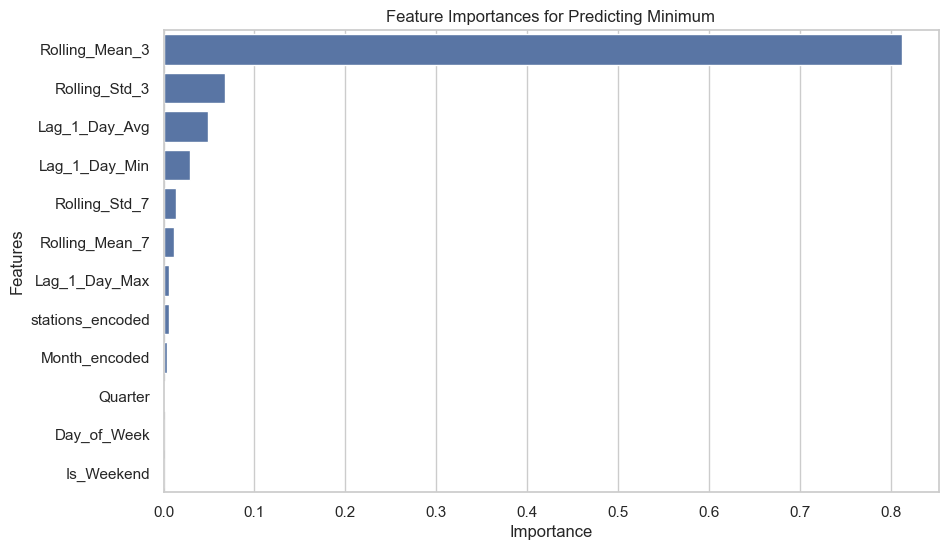

R^2 Score for Maximum - Training Set: 0.9964702571039914
R^2 Score for Maximum - Testing Set: 0.975761973570921


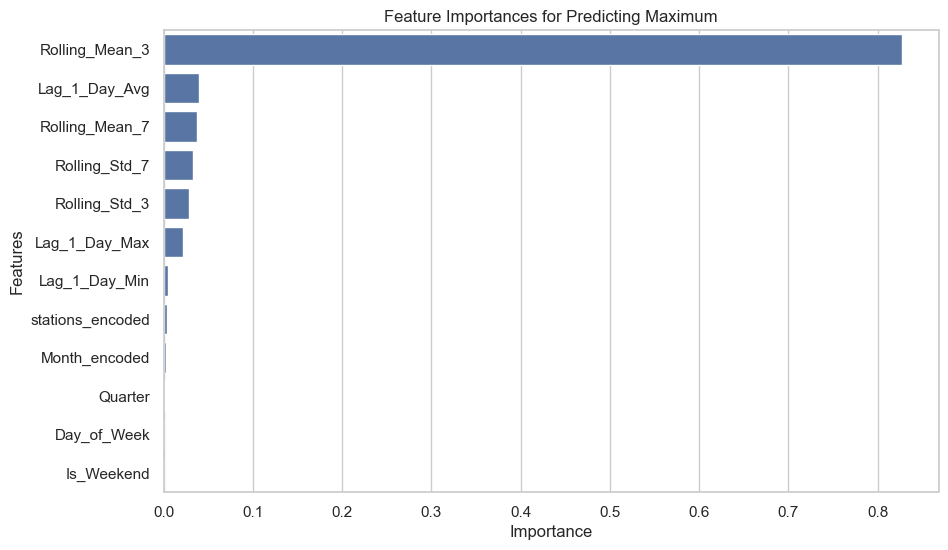

R^2 Score for Average - Training Set: 0.9972325439822536
R^2 Score for Average - Testing Set: 0.9787043322700705


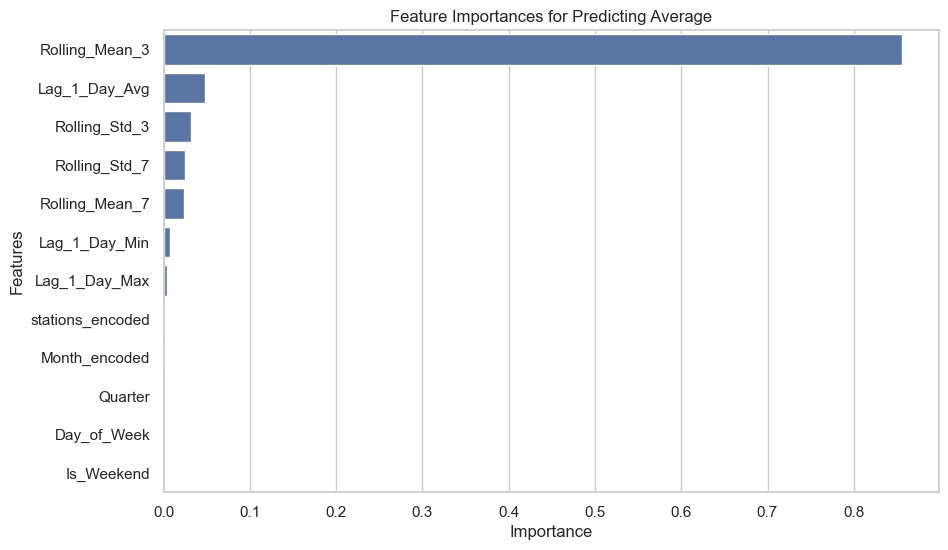

In [408]:
def train_and_evaluate(target):
  X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)

  print(f"R^2 Score for {target} - Training Set: {r2_train}")
  print(f"R^2 Score for {target} - Testing Set: {r2_test}")

  feature_importances = model.feature_importances_
  features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
  features_df.sort_values(by='Importance', ascending=False, inplace=True)

  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=features_df)
  plt.title(f'Feature Importances for Predicting {target}')
  plt.xlabel('Importance')
  plt.ylabel('Features')
  plt.show()

for target in ['Minimum', 'Maximum', 'Average']:
  train_and_evaluate(target)

# **Regression**

In [409]:
def train_and_evaluate(models, features, targets):
  results = {}
  for model_name, model in models.items():
    print(f"Training {model_name}...")
    results[model_name] = {}
    for target in targets:
      X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
      model.fit(X_train, y_train)
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)
      train_r2 = r2_score(y_train, y_train_pred)
      test_r2 = r2_score(y_test, y_test_pred)
      rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
      mae = mean_absolute_error(y_test, y_test_pred)
      results[model_name][target] = (train_r2, test_r2, rmse, mae)
      print(f"{target} - Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

  return results

In [410]:
models = {
  "Linear Regression": LinearRegression(),
  "Decision Tree": DecisionTreeRegressor(random_state=42),
  "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
  "Gradient Boosting": GradientBoostingRegressor(random_state=42),
  "SVR": SVR()
}

features = ['Month_encoded', 'stations_encoded', 'Day_of_Week', 'Is_Weekend', 'Quarter',
            'Lag_1_Day_Min', 'Lag_1_Day_Max', 'Lag_1_Day_Avg', 'Rolling_Mean_3', 'Rolling_Std_3',
            'Rolling_Mean_7', 'Rolling_Std_7']

model_results = train_and_evaluate(models, features, ['Minimum', 'Maximum', 'Average'])

Training Linear Regression...
Minimum - Train R²: 0.8500, Test R²: 0.8493, RMSE: 0.3836, MAE: 0.2163
Maximum - Train R²: 0.8663, Test R²: 0.8692, RMSE: 0.3603, MAE: 0.1794
Average - Train R²: 0.8747, Test R²: 0.8774, RMSE: 0.3477, MAE: 0.1557
Training Decision Tree...
Minimum - Train R²: 1.0000, Test R²: 0.9506, RMSE: 0.2197, MAE: 0.0707
Maximum - Train R²: 1.0000, Test R²: 0.9432, RMSE: 0.2374, MAE: 0.0680
Average - Train R²: 1.0000, Test R²: 0.9508, RMSE: 0.2203, MAE: 0.0381
Training Random Forest...
Minimum - Train R²: 0.9957, Test R²: 0.9681, RMSE: 0.1765, MAE: 0.0716
Maximum - Train R²: 0.9965, Test R²: 0.9758, RMSE: 0.1551, MAE: 0.0567
Average - Train R²: 0.9972, Test R²: 0.9787, RMSE: 0.1449, MAE: 0.0328
Training Gradient Boosting...
Minimum - Train R²: 0.9610, Test R²: 0.9493, RMSE: 0.2224, MAE: 0.1394
Maximum - Train R²: 0.9741, Test R²: 0.9638, RMSE: 0.1895, MAE: 0.1069
Average - Train R²: 0.9828, Test R²: 0.9723, RMSE: 0.1653, MAE: 0.0748
Training SVR...
Minimum - Train R²: 

Best Model is Random Forest!

# **Classification**

In [411]:
# Define price categories based on quantile distribution
data['Price_Category'] = pd.qcut(data['Average'], 3, labels=["Low", "Medium", "High"])


In [412]:
def train_and_evaluate_classification(models, features, target):
  X = data[features]
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  results = {}
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_prob_test = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    roc_auc_test = roc_auc_score(y_test, y_prob_test, multi_class='ovo') if y_prob_test is not None and y_prob_test.shape[1] > 1 else None
    
    results[model_name] = {
      'Train Accuracy': accuracy_score(y_train, y_train_pred),
      'Test Accuracy': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred, average='weighted'),
      'Recall': recall_score(y_test, y_test_pred, average='weighted'),
      'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
      'ROC AUC (Test)': roc_auc_test
    }
    
    print(f"{model_name} - Training Accuracy: {results[model_name]['Train Accuracy']:.2f}, Testing Accuracy: {results[model_name]['Test Accuracy']:.2f}")
    print(f"Other Metrics: Precision: {results[model_name]['Precision']:.2f}, Recall: {results[model_name]['Recall']:.2f}, F1 Score: {results[model_name]['F1 Score']:.2f}")
    if roc_auc_test is not None:
      print(f"ROC AUC (Test): {roc_auc_test:.2f}")
    print()

  return results


In [413]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

classification_results = train_and_evaluate_classification(classification_models, features, 'Price_Category')

Logistic Regression - Training Accuracy: 0.93, Testing Accuracy: 0.91
Other Metrics: Precision: 0.92, Recall: 0.91, F1 Score: 0.91
ROC AUC (Test): 0.99

Decision Tree - Training Accuracy: 1.00, Testing Accuracy: 0.97
Other Metrics: Precision: 0.97, Recall: 0.97, F1 Score: 0.97
ROC AUC (Test): 0.98

Random Forest - Training Accuracy: 1.00, Testing Accuracy: 0.98
Other Metrics: Precision: 0.98, Recall: 0.98, F1 Score: 0.98
ROC AUC (Test): 1.00

Gradient Boosting - Training Accuracy: 0.99, Testing Accuracy: 0.97
Other Metrics: Precision: 0.97, Recall: 0.97, F1 Score: 0.97
ROC AUC (Test): 1.00

SVM - Training Accuracy: 0.90, Testing Accuracy: 0.90
Other Metrics: Precision: 0.90, Recall: 0.90, F1 Score: 0.90
ROC AUC (Test): 0.98



Random Forest is Best with Testing Accuracy 0.98!

# **Model Evaluation and Validation**

## **a) Overfitting and Underfitting**

Random Forest overfits in both Regression and Classification

In [280]:
# Adjusting Random Forest for regression
regression_model = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)
}
train_and_evaluate(regression_model, features, ['Minimum', 'Maximum', 'Average'])

print()

# Adjusting Random Forest for classification
classification_model = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)
}
classification_results = train_and_evaluate_classification(classification_model, features, 'Price_Category')

Training Random Forest Regressor...
Minimum - Train R²: 0.9812, Test R²: 0.9572, RMSE: 0.2043, MAE: 0.1089
Maximum - Train R²: 0.9890, Test R²: 0.9703, RMSE: 0.1717, MAE: 0.0826
Average - Train R²: 0.9942, Test R²: 0.9760, RMSE: 0.1539, MAE: 0.0488

Random Forest Classifier - Training Accuracy: 1.00, Testing Accuracy: 0.98
Other Metrics: Precision: 0.98, Recall: 0.98, F1 Score: 0.98
ROC AUC (Test): 1.00



Train R² have decreased for Regression.

Accuracy has largely remained same.

## **b) Hyperparameter Tuning and Cross-Validation**

### **Regression**

In [284]:
def tune_and_evaluate_regression(model, params, features, target):
  X = data[features]
  y = data[target]
  
  # Splitting the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  # Setting up GridSearchCV
  grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='r2', verbose=1, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  
  # Getting the best model
  best_model = grid_search.best_estimator_
  
  # Evaluating the best model on the training and test sets
  y_train_pred = best_model.predict(X_train)
  y_test_pred = best_model.predict(X_test)
  
  print("Best parameters:", grid_search.best_params_)
  print("Train R²:", r2_score(y_train, y_train_pred))
  print("Test R²:", r2_score(y_test, y_test_pred))

  return best_model

In [285]:
rf_regressor_params = {
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 4],
  'min_samples_leaf': [1, 2]
}

best_rf_regressor = tune_and_evaluate_regression(RandomForestRegressor(random_state=42), rf_regressor_params, features, 'Average')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Train R²: 0.9960664796006895
Test R²: 0.977660994997317


In [286]:
rf_regressor_params = {
  'n_estimators': [200, 300],  # Fewer options, focusing on higher values
  'max_depth': [None, 30],     # Explore no limit and a reasonably high limit
  'min_samples_split': [2, 10],  # Minimum and a slightly higher value for more generalization
  'min_samples_leaf': [1, 2]   # Minimal leaf samples to avoid overfitting
}

best_rf_regressor = tune_and_evaluate_regression(RandomForestRegressor(random_state=42), rf_regressor_params, features, 'Average')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train R²: 0.9972205595912998
Test R²: 0.9780299811703544


### **Classification**

In [287]:
def tune_and_evaluate_classification(model, params, features, target):
  X = data[features]
  y = data[target]
  
  # Splitting the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  # Setting up GridSearchCV
  grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  
  # Getting the best model
  best_model = grid_search.best_estimator_
  
  # Evaluating the best model on the training and test sets
  y_train_pred = best_model.predict(X_train)
  y_test_pred = best_model.predict(X_test)
  
  print("Best parameters:", grid_search.best_params_)
  print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
  print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

  return best_model

In [288]:
rf_classifier_params = {
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 4],
  'min_samples_leaf': [1, 2]
}

best_rf_classifier = tune_and_evaluate_classification(RandomForestClassifier(random_state=42), rf_classifier_params, features, 'Price_Category')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Accuracy: 1.0
Test Accuracy: 0.9800315291644771


In [290]:
rf_classifier_params = {
  'n_estimators': [100, 200, 300],       # Number of trees in the forest
  'max_depth': [None, 10, 20],           # Maximum depth of each tree
  'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
  'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
  'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
  'bootstrap': [True, False]             # Method for sampling data points (with or without replacement)
}


best_rf_classifier = tune_and_evaluate_classification(RandomForestClassifier(random_state=42), rf_classifier_params, features, 'Price_Category')


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/opt/homebrew/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
619 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.12/site-pack

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 0.9998686112206018
Test Accuracy: 0.9816079873883342


In [291]:
best_rf_reg_params = {
  'n_estimators': 200,
  'max_depth': None,
  'min_samples_split': 2,
  'min_samples_leaf': 1
}

# Instantiate the model with the best parameters
best_rf_reg = RandomForestRegressor(**best_rf_reg_params, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Average'], test_size=0.2, random_state=42)

# Train the model
best_rf_reg.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = best_rf_reg.predict(X_train)
y_test_pred = best_rf_reg.predict(X_test)

# Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train R²: {train_r2}, Test R²: {test_r2}")
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

Train R²: 0.9972205595912998, Test R²: 0.9780299811703544
Train RMSE: 0.05281144377828338, Test RMSE: 0.1471930739900584


/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [292]:
best_rf_cls_params = {
  'bootstrap': False,
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200
}

# Instantiate the model with the best parameters
best_rf_cls = RandomForestClassifier(**best_rf_cls_params, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Price_Category'], test_size=0.2, random_state=42)

# Train the model
best_rf_cls.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = best_rf_cls.predict(X_train)
y_test_pred = best_rf_cls.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9998686112206018, Test Accuracy: 0.9816079873883342


# **Time-Series Analysis**

In [420]:
def forecast_prices(data, target):
  predictions = pd.DataFrame()
  for station in data['stations'].unique():
    station_data = data[data['stations'] == station]
    station_data = station_data.dropna(subset=[target])

    if len(station_data) < 2:  # Check if there is enough data
      print(f"Not enough data for {station} to predict {target}")
      continue

    df_prophet = station_data[['Date.1', target]].rename(columns={'Date.1': 'ds', target: 'y'})
    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=90, freq='D')
    forecast = model.predict(future)

    forecast['station'] = station
    forecast = forecast[['ds', 'yhat', 'station']]
    forecast.rename(columns={'yhat': f'Predicted_{target}'}, inplace=True)
    predictions = pd.concat([predictions, forecast], ignore_index=True)

  return predictions

In [421]:
# Load historical data
historical_data = pd.read_excel('Maize_Prices.xlsx')
historical_data['Date.1'] = pd.to_datetime(historical_data['Date.1'])
historical_data['stations'] = historical_data['stations'].map(name_mapping).astype('category')

# Predict each target
predicted_min = forecast_prices(historical_data, 'Minimum')
predicted_max = forecast_prices(historical_data, 'Maximum')
predicted_avg = forecast_prices(historical_data, 'Average')

# Combine predictions
predictions = predicted_min.merge(predicted_max, on=['ds', 'station'])
predictions = predictions.merge(predicted_avg, on=['ds', 'station'])

# Load new data for which predictions are needed
new_data = pd.read_excel('maize_dates_2024.xlsx')
new_data['Date.1'] = pd.to_datetime(new_data['Date.1'])
# new_data['stations'] = new_data['stations'].map(name_mapping).astype('category')

# Merge predictions with the new data
final_data = new_data.merge(predictions, how='left', left_on=['Date.1', 'stations'], right_on=['ds', 'station'])
final_data.drop(columns=['ds', 'station'], inplace=True)  # Drop unnecessary columns after merge

# Save or print the final predictions
final_data.to_excel('Predicted_Maize_Prices_2024.xlsx')
print(final_data[['Date.1', 'stations', 'Predicted_Minimum', 'Predicted_Maximum', 'Predicted_Average']])

12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing
12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing
12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing
12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing
12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing
12:31:39 - cmdstanpy - INFO - Chain [1] start processing
12:31:39 - cmdstanpy - INFO - Chain [1] done processing
12:31:39 - cmdstanpy - INFO - Chain [1] start processing
12:31:39 - cmdstanpy - INFO - Chain [1] done processing
12:31:39 - cmdstanpy - INFO - Chain [1] start processing
12:31:39 - cmdstanpy - INFO - Chain [1] done processing
12:31:39 - cmdstanpy - INFO - Chain [1] start processing
12:31:39 - cmdstanpy - INFO - Chain [1]

Not enough data for Hazro to predict Minimum


12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:46 - cmdstanpy - INFO - Chain [1] start processing
12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:46 - cmdstanpy - INFO - Chain [1] start processing
12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:46 - cmdstanpy - INFO - Chain [1] start processing
12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:46 - cmdstanpy - INFO - Chain [1] start processing
12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:46 - cmdstanpy - INFO - Chain [1] start processing
12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:46 - cmdstanpy - INFO - Chain [1] start processing
12:31:46 - cmdstanpy - INFO - Chain [1] done processing
12:31:47 - cmdstanpy - INFO - Chain [1] start processing
12:31:47 - cmdstanpy - INFO - Chain [1] done processing
12:31:47 - cmdstanpy - INFO - Chain [1] start processing
12:31:48 - cmdstanpy - INFO - Chain [1] done processing
12:31:48 - cmdstanpy - INFO - Chain [1] 

Not enough data for Hazro to predict Maximum


12:31:54 - cmdstanpy - INFO - Chain [1] done processing
12:31:54 - cmdstanpy - INFO - Chain [1] start processing
12:31:54 - cmdstanpy - INFO - Chain [1] done processing
12:31:54 - cmdstanpy - INFO - Chain [1] start processing
12:31:56 - cmdstanpy - INFO - Chain [1] done processing
12:31:56 - cmdstanpy - INFO - Chain [1] start processing
12:31:56 - cmdstanpy - INFO - Chain [1] done processing
12:31:56 - cmdstanpy - INFO - Chain [1] start processing
12:31:56 - cmdstanpy - INFO - Chain [1] done processing
12:31:56 - cmdstanpy - INFO - Chain [1] start processing
12:31:56 - cmdstanpy - INFO - Chain [1] done processing
12:31:56 - cmdstanpy - INFO - Chain [1] start processing
12:31:56 - cmdstanpy - INFO - Chain [1] done processing
12:31:56 - cmdstanpy - INFO - Chain [1] start processing
12:31:57 - cmdstanpy - INFO - Chain [1] done processing
12:31:57 - cmdstanpy - INFO - Chain [1] start processing
12:31:57 - cmdstanpy - INFO - Chain [1] done processing
12:31:57 - cmdstanpy - INFO - Chain [1] 

Not enough data for Hazro to predict Average


12:32:07 - cmdstanpy - INFO - Chain [1] done processing
12:32:07 - cmdstanpy - INFO - Chain [1] start processing
12:32:07 - cmdstanpy - INFO - Chain [1] done processing
12:32:07 - cmdstanpy - INFO - Chain [1] start processing
12:32:08 - cmdstanpy - INFO - Chain [1] done processing
12:32:08 - cmdstanpy - INFO - Chain [1] start processing
12:32:08 - cmdstanpy - INFO - Chain [1] done processing
12:32:08 - cmdstanpy - INFO - Chain [1] start processing
12:32:08 - cmdstanpy - INFO - Chain [1] done processing
12:32:08 - cmdstanpy - INFO - Chain [1] start processing
12:32:08 - cmdstanpy - INFO - Chain [1] done processing
12:32:08 - cmdstanpy - INFO - Chain [1] start processing
12:32:08 - cmdstanpy - INFO - Chain [1] done processing
12:32:08 - cmdstanpy - INFO - Chain [1] start processing
12:32:10 - cmdstanpy - INFO - Chain [1] done processing


         Date.1        stations  Predicted_Minimum  Predicted_Maximum  \
0    2024-01-01        Arifwala         1664.46781        2249.488027   
1    2024-01-01       Hafizabad                NaN                NaN   
2    2024-01-01           Gojra                NaN                NaN   
3    2024-01-01     Mian Channu                NaN                NaN   
4    2024-01-01  Rahim Yar Khan                NaN                NaN   
...         ...             ...                ...                ...   
1394 2024-02-29         Pattoki         1760.79066        2061.297100   
1395 2024-02-29         Pattoki         1760.79066        2061.297100   
1396 2024-02-29         Pattoki         1760.79066        2061.297100   
1397 2024-02-29       Hafizabad                NaN                NaN   
1398 2024-02-29  Rahim Yar Khan                NaN                NaN   

      Predicted_Average  
0           1977.571436  
1                   NaN  
2                   NaN  
3                  

In [422]:
final_data['stations'].unique()

array(['Arifwala', 'Hafizabad', 'Gojra', 'Mian Channu', 'Rahim Yar Khan',
       'Sahiwal', 'Multan', 'Pattoki', 'Chowk Azam', 'Dipalpur', 'Okara',
       'Kasur', 'Chichawatni', 'Kamalia', 'Depalpur', 'Faisalabad',
       'Bahawalpur', 'Lodhran', 'Sadiqabad', 'Toba Tek Singh'],
      dtype=object)

In [423]:
final_data.describe()

,Date,Year,Date.1,Minimum,Maximum,Average,Predicted_Minimum,Predicted_Maximum,Predicted_Average
count,1399.000000,1399.0,1399,0.0,0.0,0.0,990.000000,990.000000,990.000000
mean,16.225161,2024.0,2024-01-30 20:55:45.246604800,NaN,NaN,NaN,1729.558946,1942.615654,1817.793848
min,1.000000,2024.0,2024-01-01 00:00:00,NaN,NaN,NaN,-792.974380,-965.365646,-837.921044
25%,9.000000,2024.0,2024-01-16 00:00:00,NaN,NaN,NaN,1664.467810,1833.104813,1636.769141
50%,17.000000,2024.0,2024-01-30 00:00:00,NaN,NaN,NaN,1772.629093,2034.205107,1943.239175
75%,24.000000,2024.0,2024-02-16 00:00:00,NaN,NaN,NaN,1883.574872,2188.894515,2104.184710
max,31.000000,2024.0,2024-02-29 00:00:00,NaN,NaN,NaN,3717.753036,3906.631497,3793.322343
std,8.861277,0.0,NaN,NaN,NaN,NaN,604.964252,682.290482,653.671555


In [424]:
final_data.head(10)

,Month,Date,Year,Date.1,stations,Minimum,Maximum,Average,Predicted_Minimum,Predicted_Maximum,Predicted_Average
0,Jan,1,2024,2024-01-01,Arifwala,NaN,NaN,NaN,1664.467810,2249.488027,1977.571436
1,Jan,1,2024,2024-01-01,Hafizabad,NaN,NaN,NaN,NaN,NaN,NaN
2,Jan,1,2024,2024-01-01,Gojra,NaN,NaN,NaN,NaN,NaN,NaN
3,Jan,1,2024,2024-01-01,Mian Channu,NaN,NaN,NaN,NaN,NaN,NaN
4,Jan,1,2024,2024-01-01,Rahim Yar Khan,NaN,NaN,NaN,NaN,NaN,NaN
5,Jan,1,2024,2024-01-01,Sahiwal,NaN,NaN,NaN,2012.184915,2308.715227,2248.691125
6,Jan,1,2024,2024-01-01,Multan,NaN,NaN,NaN,NaN,NaN,NaN
7,Jan,1,2024,2024-01-01,Pattoki,NaN,NaN,NaN,1900.229097,2295.996757,1627.728898
8,Jan,1,2024,2024-01-01,Chowk Azam,NaN,NaN,NaN,NaN,NaN,NaN
9,Jan,1,2024,2024-01-01,Dipalpur,NaN,NaN,NaN,1864.495087,1934.379737,1891.919308
